In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import ipywidgets
import pandas as pd

In [2]:
from datasets.mnist import mnist_data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist_data()

In [4]:
@ipywidgets.interact(i=ipywidgets.widgets.IntSlider(min=0, max=x_train.shape[0]-1, step=1, value=0))
def plot_img(i=1):
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'label: {y_test[i]}')

interactive(children=(IntSlider(value=0, description='i', max=59999), Output()), _dom_classes=('widget-interac…

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0:1].shape

(1, 28, 28)

In [9]:
x_np = torch.from_numpy(x_train[0:1])

In [10]:
model(x_np)

tensor([[ -4.3175,  -1.4349,  11.2225, -20.9679,   9.1151,  10.1445,  -2.6740,
          34.2519,  17.5969,  22.3943]], grad_fn=<AddmmBackward>)

In [12]:
model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
optimizer = torch.optim.Adam(model.parameters(),lr=3e-4)

In [13]:
x_train_tensor = torch.from_numpy(x_train)
y_train_tensor = torch.from_numpy(y_train)

In [18]:
batch_size = 128
train_metrics = pd.DataFrame(columns=['loss', 'acc_batch'])

for i in (t := tqdm.trange(400)):
    idx = np.random.randint(0, x_train.shape[0], 32)
    
    x_batch = x_train_tensor[idx]
    y_batch = y_train_tensor[idx]
    
    # Compute prediction error
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    batch_acc = (pred.argmax(1) == y_batch).float().mean()    
    train_metrics.loc[i, :] = (loss.item(), batch_acc.item())
    t.set_description(f"loss: {loss.item():.2} acc: {batch_acc:.2}")

loss: 0.36 acc: 0.94: 100%|██████████| 400/400 [00:08<00:00, 46.52it/s]  


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

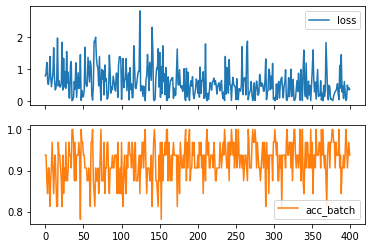

In [19]:
train_metrics.plot(subplots=True)

In [20]:
pred_train = model(x_train_tensor)
acc_train = (pred_train.argmax(1) == y_train_tensor).float().mean()
print(acc_train.item())

0.937749981880188


In [21]:
x_test_tensor = torch.from_numpy(x_test)
y_test_tensor = torch.from_numpy(y_test) 
pred_test = model(x_test_tensor)
acc_test = (pred_test.argmax(1) == y_test_tensor).float().mean()
print(acc_test.item())

0.9329000115394592
